# Simple neural network Multi-layer perceptron

A feed-forward bachpropagation multilayer perceptron neural network using TensorFlow to classify Nepali handwritten digits.

- Author: Ashok Kuamr Pant
- Company: Treeleaf Technologies Pvt. Ltd. (treeleaf.ai)
- Email: asokpant@gmail.com
- Date: 11 May, 2018

## Nepali Handwritten Character Dataset Overview
### Overview
NHCD dataset is a Nepali handwritten character dataset. It contains three individual categories (numerals, vowels and consonants). Samples are collected from 40 individuals from different fields and cropped for character boundary and resized to 28x28.

* Numerals (288 samples per class, 10 classes)
* Vowels (221 samples per class, 12 classes)
* Consonants (205 samples per class, 36 classes)

### Samples
* Numerals ![numerals.png](../../data/numerals.png)
* Vowels ![vowels.png](../../data/vowels.png)
* Consonants ![consonants.png](../../data/consonants.png)
    
### Citation
Please cite in your publications if it helps your research:

    ```text
    @inproceedings{pant2012off,
      title={Off-line Nepali handwritten character recognition using Multilayer Perceptron and Radial Basis Function neural networks},
      author={Pant, Ashok Kumar and Panday, Sanjeeb Prasad and Joshi, Shashidhar Ram},
      booktitle={2012 Third Asian Himalayas International Conference on Internet},
      pages={1--5},
      year={2012},
      organization={IEEE}
    }
    ```

More info: https://www.kaggle.com/ashokpant/devanagari-character-dataset

In [1]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
import numpy as np
import os
import sys
tf.set_random_seed(1234)
np.random.seed(1234)
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

/home/ashok/anaconda3/envs/ml3/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# Import data
from utils.dataset import create_handwritten_dataset

train_data, train_labels, test_data, test_labels, label_map = create_handwritten_dataset(
        "/home/ashok/Data/Datasets/devanagari-character-dataset/nhcd/numerals", test_ratio=0.2)

n_classes = len(label_map)
image_size = (28, 28)
image_channel = 1
n_train_samples = len(train_labels)
n_test_samples = len(test_labels)

print("Classes: {}, Label map: {}".format(n_classes, label_map))
print("Train samples: {}, Test samples: {}".format(n_train_samples, n_test_samples))

Classes: 10, Label map: {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9'}
Train samples: 2304, Test samples: 576


In [3]:
# Parameters
learning_rate = 0.001
training_epochs = 200
batch_size = 128
display_step = 1

In [4]:
# Network Parameters
n_hidden_1 = 256 # 1st layer number of features
n_hidden_2 = 256 # 2nd layer number of features
n_input = 784 # NHCD data input (img shape: 28*28)

# tf Graph input
x = tf.placeholder("float", [None, n_input], name="x")
y = tf.placeholder("float", [None, n_classes], name="y")

# Create model
def multilayer_perceptron(x, weights, biases):
    # Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    # Hidden layer with RELU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    # Output layer with linear activation
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
   
    return out_layer

# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

# Construct model
pred = multilayer_perceptron(x, weights, biases)

# Predictions
pred_probas = tf.nn.softmax(pred)
pred_classes = tf.argmax(pred, axis=1)

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

# Accuracy
correct = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
acc =  tf.reduce_mean(tf.cast(correct, tf.float32))
    
# Initializing the variables
init = tf.global_variables_initializer()

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [5]:
# Start training

config = tf.ConfigProto(
        device_count = {'GPU': 0}
    )
sess = tf.InteractiveSession(config=config)

sess.run(init)

# Training cycle
for epoch in range(training_epochs):
    avg_cost = 0.
    total_batch = int(n_train_samples/batch_size)
    if n_train_samples % batch_size != 0: # samller last batch
        total_batch += 1

    # Loop over all batches
    for i in range(total_batch):
        start = i*batch_size
        end = start+batch_size
        if end > n_train_samples:
            end = n_train_samples-1
        batch_x = train_data[start:end]
        batch_y = train_labels[start:end]
        # Run optimization op (backprop) and cost op (to get loss value)
        _, c = sess.run([optimizer, cost], feed_dict={x: batch_x,
                                                      y: batch_y})
        # Compute average loss
        avg_cost += c / total_batch
    # Display logs per epoch step
    if epoch % display_step == 0:
        print("Epoch: {:04d}, cost = {:.9f}".format(epoch+1, avg_cost))
        
print("Optimization Finished!")

# Testing
train_acc = sess.run(acc, feed_dict={x:train_data, y: train_labels})
test_acc = sess.run(acc, feed_dict={x:test_data, y: test_labels})

print("Train Accuracy: {:.2f}%".format(train_acc*100))
print("Test Accuracy: {:.2f}%".format(test_acc*100))

Epoch: 0001, cost = 5726.769500732
Epoch: 0002, cost = 374.416338603
Epoch: 0003, cost = 245.919551426
Epoch: 0004, cost = 181.263372633
Epoch: 0005, cost = 143.947429657
Epoch: 0006, cost = 117.932838016
Epoch: 0007, cost = 101.671468523
Epoch: 0008, cost = 86.977004157
Epoch: 0009, cost = 75.855136236
Epoch: 0010, cost = 66.139711168
Epoch: 0011, cost = 59.041572995
Epoch: 0012, cost = 51.464596007
Epoch: 0013, cost = 46.366860602
Epoch: 0014, cost = 42.775164816
Epoch: 0015, cost = 38.312017441
Epoch: 0016, cost = 35.144023418
Epoch: 0017, cost = 31.373642604
Epoch: 0018, cost = 28.494442569
Epoch: 0019, cost = 26.668315199
Epoch: 0020, cost = 25.347460535
Epoch: 0021, cost = 22.973378075
Epoch: 0022, cost = 20.334816668
Epoch: 0023, cost = 19.203133901
Epoch: 0024, cost = 17.972181002
Epoch: 0025, cost = 16.085227278
Epoch: 0026, cost = 14.742126491
Epoch: 0027, cost = 13.505850606
Epoch: 0028, cost = 12.940384971
Epoch: 0029, cost = 12.361823559
Epoch: 0030, cost = 11.142517355
Ep

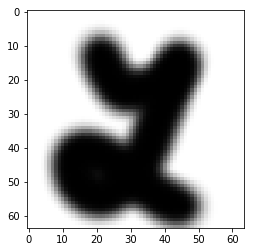

Output label: 2, score: 99.73%


In [6]:
# Inference
import numpy as np
import matplotlib.pyplot as plt
from utils.dataset import imread, imshow, imshow_array, imresize, normalize_array, im2bw, pil2array, rgb2gray

image = imread('/home/ashok/Projects/ml-for-all-github/data/five.png')

imshow(image)

if image.size != image_size:
    image = imresize(image, image_size)
    
image = rgb2gray(image)
image  = pil2array(image)
image = normalize_array(image)
image = np.reshape(image, (image_size[0]*image_size[1]*image_channel))
image  = np.reshape(np.asarray(image), image_size[0]*image_size[1]*image_channel)

output  = sess.run(pred_probas, feed_dict={x:[image]})
output_label = np.argmax(output)

print('Output label: {}, score: {:.2f}%'.format(output_label, output[0][output_label]*100))